In [1]:
import os
import cv2
import glob
import h5py
from scipy.io import loadmat
import numpy as np
from tqdm import tqdm
from utils import get_density_map_gaussian
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
%matplotlib inline


with_direction = False

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


(733, 2)


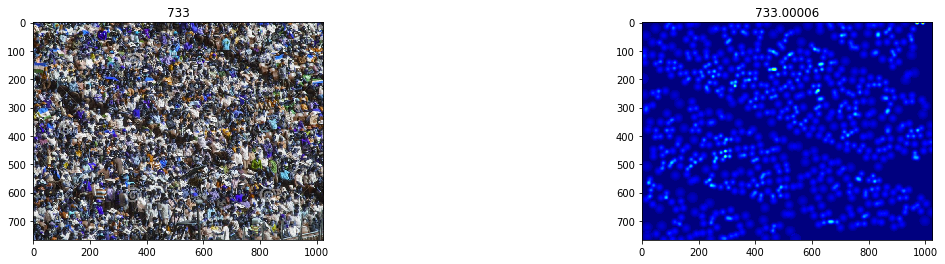

(90, 2)


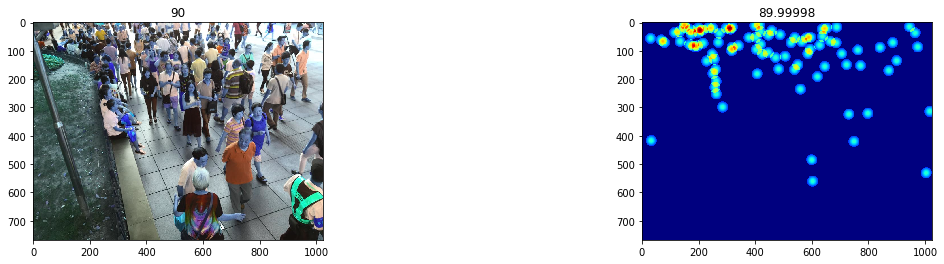

In [2]:
# Show a sample
img_paths = ['part_A/train_data/images/IMG_108.jpg',
             'part_B/train_data/images/IMG_20.jpg']
from utils import load_img
is_adaptive = False
for img_path in img_paths:
    is_adaptive = not is_adaptive
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
    img = cv2.imread(img_path)

    k = np.zeros((img.shape[0], img.shape[1]))

    gt = pts["image_info"][0, 0][0, 0][0]
    print(gt.shape)

    for i in range(len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1

    k = get_density_map_gaussian(k, gt, adaptive_mode=is_adaptive)

    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 4))
    ax0.imshow(img)
    ax0.set_title(str(gt.shape[0]))
    ax1.imshow(k, cmap=plt.cm.jet)
    ax1.set_title(str(np.sum(k)))
    plt.show()

In [3]:
img_ori.shape

(768, 1024, 3)

In [4]:
img_ori.shape

(768, 1024, 3)

In [5]:
k.shape

(768, 1024)

In [2]:
from data import CrowdDataSet 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ds = CrowdDataSet('part_A/train_data/')

In [4]:
x = ds[0]

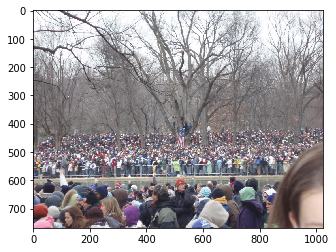

1545.9998

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
plt.imshow(x['image'])
plt.show()

print(x['den'])
np.sum(x['den'])

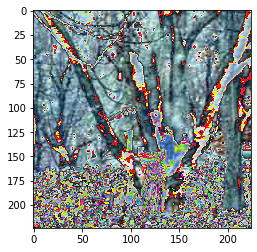

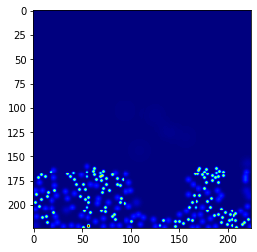

213.0

In [6]:
from data import CrowdDataSet 
from data import default_train_transforms, default_val_transforms
from torchvision import transforms
from PIL import Image
from utils import get_density_map_gaussian

loaders = {
    "train": CrowdDataSet(
        'part_A/train_data', default_train_transforms(output_size=224, factor=1)
    ),
    "val": CrowdDataSet(
        'part_A/test_data', default_val_transforms(output_size=224, factor=1)
    )
}

transformed_img = transforms.ToPILImage()(loaders['train'][0]['image']).convert('RGB')
plt.imshow(transformed_img)
plt.show()

k = np.zeros((transformed_img.width, transformed_img.height))
k = get_density_map_gaussian(k, loaders['train'][0]['gt'], adaptive_mode=True)
plt.imshow(k, cmap=plt.cm.jet)
plt.show()
np.sum(k)

In [7]:
from models import VGG16Transfer, ResNetTransfer, InceptionV3Transfer
from trainer import train, trainInception
import torch.optim as optim
import torch.nn as nn
import torch

# # Model
# model = VGG16Transfer(scale_factor=32) 
# # Loss
# criterion = nn.MSELoss()
# # Optimizer
# lr = 1e-5
# optimizer = optim.Adam(model.parameters(), lr=lr)


# # Train
# train(model, loaders['train'], criterion, optimizer, 20)
# torch.save(model, 'saved_models/vgg16')

print(len(loaders['train']))

300


In [ ]:
import torch

model1 = torch.load('saved_models/vgg16')
model1.eval()

predictions = []
actual = []

for i, data in enumerate(loaders['train'], 0):
#     print(i)
    # get the inputs; data is a list of [inputs, labels]
    dt = data

    image = dt['image'].to()
    gt = dt['gt']
    
    model1.eval()
    preds = model1(image[None, ...].float())
    preds = preds.squeeze().data.cpu().numpy() 
    count = np.sum(preds) / 100
    
    k = np.zeros((image.shape[0], image.shape[1]))
    try:
        k = get_density_map_gaussian(k, gt, adaptive_mode=True)
    except:
        continue
        
    predictions.append(count)
    
    actual.append(np.sum(k))
    
    print(count, np.sum(k))

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\torch\nn\functional.py:3325: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


258.62146484375 213.0
58.6315185546875 54.0
72.00611328125 41.0
28.1557666015625 26.0
60.31142578125 46.0
17.07618896484375 13.0
214.381328125 138.0
8.875611572265624 10.0
27.33712646484375 25.000002
13.080433349609375 9.000001
84.2781640625 48.0
332.6016796875 194.0
179.61921875 107.0
0.590499382019043 5.0
57.09734375 46.0
140.317705078125 399.99997
208.82126953125 115.99999
95.036591796875 57.000008
22.5076123046875 15.999999
114.0784375 91.0
51.15599609375 35.0
175.70453125 120.0
42.2608935546875 20.0
89.429140625 56.0
958.241796875 625.00006
54.7290380859375 37.0
401.4716015625 261.99997
27.7714111328125 17.0
142.20896484375 110.0
1.941763916015625 8.0
6.8968017578125 7.0
90.229580078125 59.0
252.56046875 136.0
13.551060791015624 16.0
17.5915478515625 20.0
374.0009375 182.0
376.943046875 271.0
30.9272119140625 18.0
78.1454150390625 65.0
71.1676171875 38.0
371.7926953125 198.00002
129.5025 103.99999
121.67009765625 38.0
133.268271484375 92.0
115.9300390625 71.0
28.33673095703125 30.

C:\Users\Stanley Wu\Documents\DS4400\COVID-19-Crowd-Counting\utils.py:64: RuntimeWarning: invalid value encountered in true_divide
  density_map = density_map / (np.sum(density_map / num_gt))


7.3120263671875 nan
385.512890625 101.00001
416.0283984375 168.0
91.71701171875 79.0
340.968515625 126.0
73.6257861328125 44.0
139.46859375 70.0
120.571435546875 57.0
6.0793218994140625 14.0
5.846368408203125 10.0
180.34978515625 121.0
16.525841064453125 17.0
7.771410522460937 10.0
3.871817321777344 13.0
81.920634765625 52.999996
4.635732727050781 10.0
314.5927734375 226.0
68.57140625 95.0
59.848701171875 52.0
20.6858740234375 22.0
19.893609619140626 33.0
29.4458349609375 36.0
158.128203125 104.000015
310.9855078125 222.0
381.7743359375 320.0
76.6459521484375 53.0
56.7891064453125 33.0
3.34212158203125 21.0
86.193251953125 56.0
86.45890625 58.000004
90.91763671875 65.0
177.769921875 116.0
5.047993469238281 9.0
81.2103076171875 50.999996
166.24939453125 92.99999


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

for i, act in enumerate(actual):
    if np.isnan(act):
        print('-')
        actual[i] = 0

r2_score([float(x) for x in actual], [float(x) for x in predictions])